**Task 4: Statistical tests for verified and unverified accounts**

Overview: The stakeholders are interested in whether there is a statistical difference in the data between verified and unverified accounts.

Goal: I aim to identify whether there is a difference between mean video view count of verified and unverified accounts, and whether the result is statistically significant. For this, I will use 2 sample T test hypotheses test.

In [17]:
#import data libraries and load dataset (tiktok_dataset.csv)
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats
import statsmodels.stats.api as sms

TikTok_df = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\Data analytics\Portfolio\Full_cycle projects\TikTok classification machine learning\Dataset\tiktok_dataset.csv")

pd.set_option('display.max.row', 140)
pd.set_option('display.max.columns', 30)
TikTok_df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [18]:
#Identify total nulls 
TikTok_df.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [19]:
#Drop 298 rows with null values 
TikTok_df.dropna(axis=0, inplace= True)
TikTok_df.shape

(19084, 12)

In [38]:
#Descriptive statistics for numeric columns 
TikTok_df.select_dtypes(include= ['number']).describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19084.000000,1.908400e+04,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9542.500000,5.624840e+09,32.423811,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5509.220604,2.537030e+09,16.226470,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4771.750000,3.425100e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9542.500000,5.609500e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14313.250000,7.840823e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19084.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


**Check data assumptions for the 2 sample T test**

1. Data should be independent (condition is met)
2. Data are normal distribution
3. Measurements are continuous (condition is met)
4. Whether they have equal or unequal variances 

In [21]:
#Organize data for verified and unverified accounts 
verified_account = TikTok_df[TikTok_df['verified_status'] == 'verified']
notverified_account= TikTok_df[TikTok_df['verified_status'] == 'not verified']

Text(-930000, 7000, 'Observation: We have a very skewed sample data and this\nshould be noted for the future predictive model. However, data\n sample size are large enough and meet the CLT condition, and\n we can proceed with the 2 sample T test.  ')

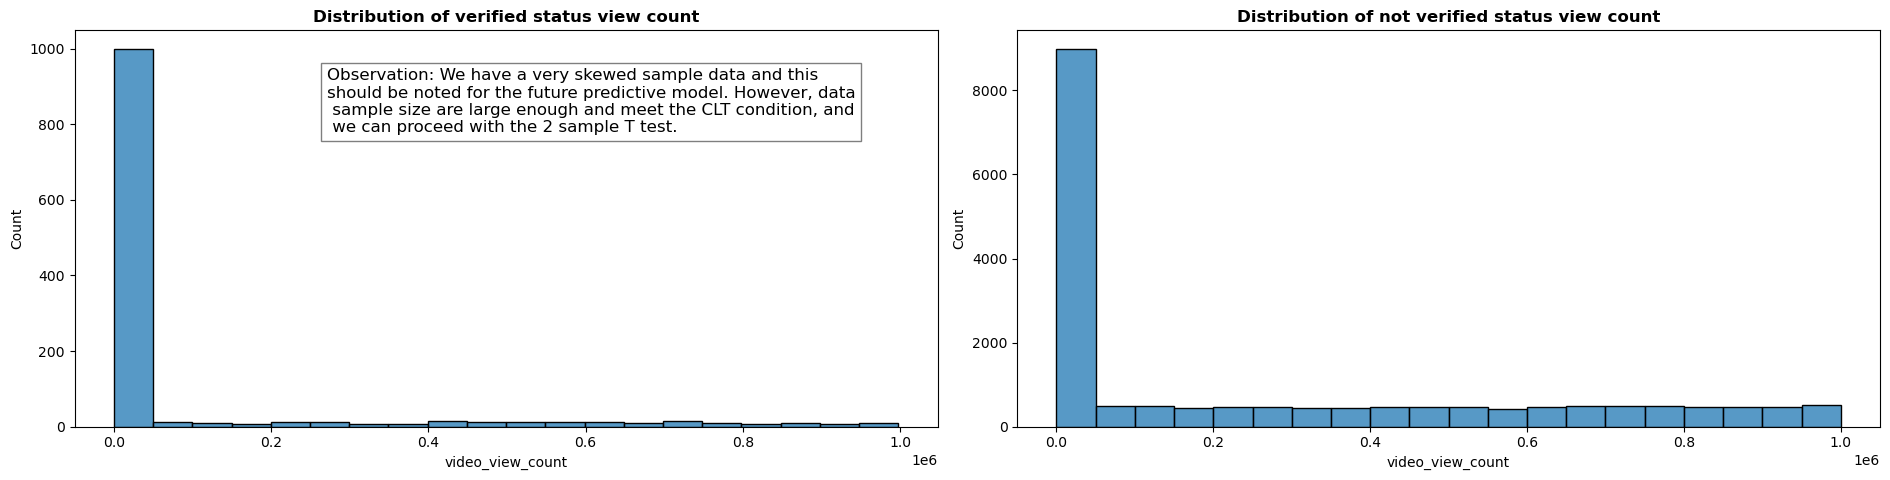

In [54]:
#Histogram to compare sample data distribution
fig, axs = plt.subplots(1,2, figsize=(19, 4.9)) 
sns.histplot(data= verified_account, x= 'video_view_count', bins= 20, ax=axs[0] )
axs[0].set_title('Distribution of verified status view count', weight='bold')

#Add a second histogram
sns.histplot(data= notverified_account, x= 'video_view_count', bins= 20, ax=axs[1] )
axs[1].set_title('Distribution of not verified status view count', weight='bold')

# Adjust layout
plt.tight_layout()

#Add description text
plt.text(-930000, 7000, 'Observation: We have a very skewed sample data and this\nshould be noted for the future predictive model. However, data\n sample size are large enough and meet the CLT condition, and\n we can proceed with the 2 sample T test.  ', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

In [73]:
#F test to identify whether 2 sample data have equal or unequal variances 
'''Hypothesis: Ho: both sample data have equal variances 
               H1: both sample data have unequal variances 
'''
#Calculate variances
var_verified = np.var(verified_account['video_view_count'], ddof=1)
var_not_verified = np.var(notverified_account['video_view_count'], ddof=1)

# Calculate sample sizes
n_verified = len(verified_account)
n_not_verified = len(notverified_account)

# F-statistics
F = var_not_verified / var_verified

#Degrees of freedom
dfn = n_not_verified - 1
dfd = n_verified - 1

#P value
p_value_F = 1 - stats.f.cdf(F, dfn, dfd)

#Show values 
print('F-statistics: ', F)
print('p-value: ', p_value_F)
print('Reject the null hypothesis (Ho) as we have close to zero P value,\n our sample data have unequal variances, so I proceed with the t-test assuming unequal variances Welch')


F-statistics:  2.168989443951626
p-value:  1.1102230246251565e-16
Reject the null hypothesis (Ho) as we have close to zero P value,
 our sample data have unequal variances, so I proceed with the t-test assuming unequal variances Welch


**Welch's T-test**

In [91]:
#Compute mean video count for verified and unverified accounts
TikTok_df.groupby('verified_status')['video_view_count'].mean().reset_index(name= 'mean_views').style.background_gradient()

,verified_status,mean_views
0,not verified,265663.785339
1,verified,91439.164167


**1. State the Hypotheses**

Null hypothesis (HO):            Mean view count (not verified) <= Mean view count (verified)

Alternative hypothesis (H1):    Mean view count (not verified) > Mean view count (verified)

**2. Choose Alpha level = 5% (95% confidence level)**

In [79]:
#Calculate the right-tailed critical value of 95% confidence level 
alpha = 0.05
df= dfn + dfd
t_critical = stats.t.ppf(1 - alpha, df)

print('Right-tailed T critical value:', t_critical)
print('Decision rule: reject the null hypothesis if T statistics > 1.65')

Right-tailed T critical value: 1.6449334845961945
Decision rule: reject the null hypothesis if T statistics > 1.65


**3. Compute T statistics and P value**

In [87]:
#Compute statistics
t_test_result = sms.ttest_ind(notverified_account['video_view_count'], verified_account['video_view_count'], alternative= 'larger', usevar='unequal')
print(t_test_result)
print('Decision: Reject the null hypothesis because T statistics 25.5 > 1.65 T critical value\n          and we have a very small P value < 0.05 alpha')

(25.499441780633777, 1.3044411843588903e-120, 1571.1630743874239)
Decision: Reject the null hypothesis because T statistics 25.5 > 1.65 T critical value
          and we have a very small P value < 0.05 alpha


**4. Conclusion**

-Reject the Null Hypothesis: The null hypothesis (that the mean view count of not verified accounts is less than or equal to the mean view count of verified accounts) is rejected.

-The extremely small P value indicates a very strong statistical significance. This result suggests a strong evidence that not verified accounts have a higher mean view count compared to verified accounts.

-The next step: I believe investigating the reasons why verified accounts have more views than verified ones (For example, do unverified accounts tend to post more clickbait-y videos? Or are unverified accounts associated with spam bots that help inflate view counts?)